<a href="https://colab.research.google.com/github/viniciusds2020/ai_crewai_starter_template/blob/main/ia_classificacao_imagem_clip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Solução versão 1.0.0 - Tipo de documento (SADT e Guia de internação) - Busca vetorial

### Configuração do ambiente

In [ ]:
!pip install torch>=1.10 transformers>=4.30 Pillow>=9.0.0 sentence-transformers faiss-cpu albumentations --quiet

In [ ]:
import os
import time
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter, ImageEnhance
from transformers import CLIPModel, CLIPProcessor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

### Entrada de dados

In [ ]:
# Caminho base no Google Drive
caminho_base = "/content/drive/MyDrive/opme"

# Lista para armazenar os caminhos e nomes das pastas
arquivos_opme = []

# Percorre todas as pastas e subpastas
for root, dirs, files in os.walk(caminho_base):
    for file in files:
        if file.lower().endswith(".png"):
            caminho_completo = os.path.join(root, file)
            nome_pasta = os.path.basename(os.path.dirname(caminho_completo))
            arquivos_opme.append((caminho_completo, nome_pasta))

# Exemplo de visualização
#for caminho, pasta in arquivos_opme[:15]:  # mostra só os 5 primeiros
#    print("'",caminho,"',")


In [ ]:
# Caminho base no Google Drive
caminho_base = "/content/drive/MyDrive/sadt"

# Lista para armazenar os caminhos e nomes das pastas
arquivos_sadt = []

# Percorre todas as pastas e subpastas
for root, dirs, files in os.walk(caminho_base):
    for file in files:
        if file.lower().endswith(".png"):
            caminho_completo = os.path.join(root, file)
            nome_pasta = os.path.basename(os.path.dirname(caminho_completo))
            arquivos_sadt.append((caminho_completo, nome_pasta))

# Exemplo de visualização
#for caminho, pasta in arquivos_sadt[:15]:
#    print("'",caminho,"',")

In [ ]:
# Caminho base no Google Drive
caminho_base = "/content/drive/MyDrive/guia_internacao"

# Lista para armazenar os caminhos e nomes das pastas
arquivos_guia_inter = []

# Percorre todas as pastas e subpastas
for root, dirs, files in os.walk(caminho_base):
    for file in files:
        if file.lower().endswith(".png"):
            caminho_completo = os.path.join(root, file)
            nome_pasta = os.path.basename(os.path.dirname(caminho_completo))
            arquivos_guia_inter.append((caminho_completo, nome_pasta))

# Exemplo de visualização
#for caminho, pasta in arquivos_guia_inter[:15]:
#    print("'",caminho,"',")

In [ ]:
import os
from PIL import Image
import torch
from transformers import CLIPProcessor, CLIPModel
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Inicializa o modelo CLIP
device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_name).to(device)
processor = CLIPProcessor.from_pretrained(model_name)

# Função para extrair embeddings
def extrair_embedding(imagem_path):
    imagem = Image.open(imagem_path).convert("RGB")
    inputs = processor(images=imagem, return_tensors="pt").to(device)
    with torch.no_grad():
        embedding = model.get_image_features(**inputs)
    return embedding.cpu().numpy().flatten()

lista_internacao = ['/content/drive/MyDrive/guia_internacao/soli_int_manuscrito_assMO_assMed_carimboMed_nao_assMedDig_01_pg_449847977_200520251558365836_CARLOS_GUIA_AUT_page1.png',
'/content/drive/MyDrive/guia_internacao/soli_int_manuscrito_assMO_assMed_carimboMed_nao_assMedDig_02_pg_420118844_221020241249184918_CARLOS_ALBERTO_FREIRE_page1.png',
'/content/drive/MyDrive/guia_internacao/soli_int_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_01_pg_426418322_291120241610591059_CAROLINA_PINHEIRO_SCOOT_SOLICITACAO_page1.png',
'/content/drive/MyDrive/guia_internacao/soli_int_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_01_pg_426847664_03122024120950950_yasmimguia_page1.png',
'/content/drive/MyDrive/guia_internacao/soli_int_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_01_pg_427496134_06122024150932932_GUIA_DE_INT_ANDREA_DOS_SANTOS06122024_page1.png',
'/content/drive/MyDrive/guia_internacao/soli_int_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_01_pg_431489662_130120251427392739_GUIA_DE_SOLIC_ERIVALDO13012025_page1.png',
'/content/drive/MyDrive/guia_internacao/soli_int_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_01_pg_442143668_240320251122322232_GSI_Lucia_page1.png',
'/content/drive/MyDrive/guia_internacao/soli_int_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_01_pg_449635861_200520251510251025_guia_kelli_page1.png',
'/content/drive/MyDrive/guia_internacao/soli_int_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_01_pg_457104167_280620250218421842_20250628_022021_page1.png',
'/content/drive/MyDrive/guia_internacao/soli_int_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_02_pg_457322775_300620251336503650_Resumo_Laudo_v1_page1.png',
'/content/drive/MyDrive/guia_internacao/soli_int_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_02_pg_457390494_30062025175901591_GUIA_DE_INTERNACAO_RN_page1.png',
'/content/drive/MyDrive/guia_internacao/soli_int_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_03_pg_432251609_170120251415141514_TANIA_FREIXO_PED_page1.png',
'/content/drive/MyDrive/guia_internacao/soli_int_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_03_pg_447249760_260420250357585758_20250426_033614_page1.png',
'/content/drive/MyDrive/guia_internacao/soli_int_nao_manuscrito_assMO_assMed_carimboMed_nao_assMedDig_01_pg_431986013_23052025090316316_MARIA20250523_page1.png',
'/content/drive/MyDrive/guia_internacao/soli_int_nao_manuscrito_assMO_assMed_carimboMed_nao_assMedDig_01_pg_442197923_140520251243274327_20250514_124324_page1.png']

lista_sadt = ['/content/drive/MyDrive/sadt/sadt_manuscrito_assMO_assMed_carimboMed_nao assMedDig_01_pg_457045137_270620251346194619_GIOVANA_SABBATINI_001_page1.png',
'/content/drive/MyDrive/sadt/sadt_manuscrito_assMO_assMed_carimboMed_nao_assDig_01_pg_457062863_27062025150232232_LUZIA_page1.png',
'/content/drive/MyDrive/sadt/sadt_manuscrito_assMO_assMed_carimboMed_nao_assMedDig_05_pg_430300958_03012025160410410_JENNIFERPEDIDO_page1.png',
'/content/drive/MyDrive/sadt/sadt_manuscrito_assMO_assMed_carimboMed_nao_assMedDig_05_pg_431166239_10012025100558558_PEDIDOJOAOPAULO_page1.png',
'/content/drive/MyDrive/sadt/sadt_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_01_pg_432303758_17012025210615615_ANDRE_LUIS__pedido_OE_page1.png',
'/content/drive/MyDrive/sadt/sadt_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_03_pg_432548005_200120251625292529_Pedido__Celia_Regina_D._page1.png',
'/content/drive/MyDrive/sadt/sadt_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_03_pg_432550652_20012025163800380_Pedido__Tania_Gonzales_page1.png',
'/content/drive/MyDrive/sadt/sadt_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_05_pg_456838206_300620251625232523_456838206__page1.png',
'/content/drive/MyDrive/sadt/sadt_nao_manuscrito_assMO_nao_assMed_nao_carimboMed_nao_assMedDig_01_pg_452795706_300520251035273527_30052025_10.33_page1.png',
'/content/drive/MyDrive/sadt/sadt_nao_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_03_pg_456152041_230620250822512251_Geraldo_Heinrichs_page1.png',
'/content/drive/MyDrive/sadt/sadt_nao_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_04_pg_429237300_1812202420010919_Pedido_Alex_Barbosa__page1.png',
'/content/drive/MyDrive/sadt/sadt_nao_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_04_pg_457109616_300620251414491449_adriana_page1.png',
'/content/drive/MyDrive/sadt/sadt_nao_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_05_pg_430730138_070120252033173317_Pedido__Eni_de_Moares_page1.png',
'/content/drive/MyDrive/sadt/sadt_nao_manuscrito_nao_assMO_nao_assMed_nao_carimboMed_nao_assMedDig_01_pg_457045087_27062025134707477_GUIA_SADT_h640284_page1.png',
'/content/drive/MyDrive/sadt/sadt_nao_manuscrito_nao_assMO_nao_assMed_nao_carimboMed_nao_assMedDig_01_pg_455905139_300620251553295329_Pedido_Tatiana_B_page1.png']


lista_opme = ['/content/drive/MyDrive/opme/opme_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_01_pg_01_pos_451661191_230520251228312831_OPME_page1.png',
'/content/drive/MyDrive/opme/opme_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_02_pg_443299901_090420250933123312_OPME__MARCO_AURELIO_page1.png',
'/content/drive/MyDrive/opme/opme_nao_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_01_pg_01_pos_432117303_170120250753505350_GuiaOpme_page1.png',
'/content/drive/MyDrive/opme/opme_nao_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_01_pg_01_pos_432279626_17012025160551551_andressa_pedido_page1.png',
'/content/drive/MyDrive/opme/opme_nao_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_01_pg_01_pos_432279626_17012025160556556_andressapedidoopme_page1.png',
'/content/drive/MyDrive/opme/opme_nao_manuscrito_nao_assMO_assMed_nao_carimboMed_nao_assMedDig_01_pg_01_pos_447949784_080520251033293329_P_OPME_LAURINDA_6698415_page1.png',
#'/content/drive/MyDrive/opme/opme_nao_manuscrito_nao_assMO_nao_assMed_nao_carimboMed_assMedDig_01_pg_01_pos_451808954_300520251638203820_soli_francisco_opme_page1.png',
#'/content/drive/MyDrive/opme/opme_nao_manuscrito_nao_assMO_nao_assMed_nao_carimboMed_nao_assMedDig_01_pg_01_pos_452011201_030620251122202220_ped6720149Valdomirmat_page1.png',
#'/content/drive/MyDrive/opme/opme_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_01_pg_01_pos_401302483_240620241014221422_ISIS_OPME_page1.png',
#'/content/drive/MyDrive/opme/opme_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_01_pg_01_pos_432258902_170120251443394339_pedido0002_page1.png',
#'/content/drive/MyDrive/opme/opme_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_01_pg_01_pos_451632976_230520251041144114_GUIA_OPME_SEU_JORGE_OE_page1.png',
#'/content/drive/MyDrive/opme/opme_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_01_pg_01_pos_451948497_300520250936383638_250530221737_page1.png',
#'/content/drive/MyDrive/opme/opme_nao_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_01_pg_01_pos_427341887_051220241733273327_Eudes_OPME_page1.png',
#'/content/drive/MyDrive/opme/opme_nao_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_01_pg_01_pos_427344036_051220241752475247_CAIO_MESSIAS_2_page1.png',
#'/content/drive/MyDrive/opme/opme_nao_manuscrito_nao_assMO_assMed_carimboMed_nao_assMedDig_01_pg_01_pos_451331832_270520251526422642_doc05562820250527184143_page1.png'
              ]

# Estrutura: dicionário com lista de caminhos por classe
referencias_por_classe = {
    "internacao": lista_internacao,
    "sadt": lista_sadt,
    "opme": lista_opme
    }


# Gera embeddings por classe
embeddings_ref = {}
for classe, imagens in referencias_por_classe.items():
    lista_embeddings = [extrair_embedding(img) for img in imagens]
    embeddings_ref[classe] = np.mean(lista_embeddings, axis=0)


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

### Modelo de similaridade

In [ ]:
import faiss

# Pré-processamento otimizado para imagens
def preprocessar_imagem(path):
    image = Image.open(path).convert("RGB")
    image = ImageEnhance.Contrast(image).enhance(1.5)
    image = ImageEnhance.Sharpness(image).enhance(2.0)
    image = image.filter(ImageFilter.GaussianBlur(radius=0.3))
    image = image.resize((224, 224), resample=Image.BICUBIC)
    return image

# Gera embedding CLIP para imagem (PIL)
def gerar_embedding_pil(image_pil):
    inputs = processor(images=image_pil, return_tensors="pt").to(device)
    with torch.no_grad():
        image_features = model.get_image_features(**inputs)
    return image_features.cpu().numpy().flatten()

# Constrói o index FAISS
def construir_faiss_index(imagens_referencia, labels_ref):
    embeddings = []
    for path in imagens_referencia:
        image = preprocessar_imagem(path)
        emb = gerar_embedding_pil(image)
        embeddings.append(emb)
    embeddings = np.vstack(embeddings)
    index = faiss.IndexFlatL2(embeddings.shape[1])
    index.add(embeddings)
    return index, np.array(labels_ref)

# Busca mais próxima no FAISS
def classificar_faiss(img_path, index_faiss, labels_ref):
    image = preprocessar_imagem(img_path)
    emb = gerar_embedding_pil(image).reshape(1, -1)
    D, I = index_faiss.search(emb, 1)
    return labels_ref[I[0][0]], D[0][0]

In [ ]:
imagens_referencia = lista_internacao + lista_sadt# + lista_opme
labels_ref = ["guia_internacao"] * len(lista_internacao) + ["sadt"] * len(lista_sadt)# + ["opme"] * len(lista_opme)
index_faiss, labels_ref_arr = construir_faiss_index(imagens_referencia, labels_ref)

In [ ]:
# Classificar todos os documentos na lista de testes
arquivos_total = arquivos_opme + arquivos_sadt + arquivos_guia_inter
label_nomes = ["guia_internacao","sadt"#,"opme"
               ]

y_true_faiss = []
y_pred_faiss = []

for img_path, true_label in arquivos_total:
    predicted_label, distance = classificar_faiss(img_path, index_faiss, labels_ref_arr)
    #print(f"Documento: {os.path.basename(img_path)}")
    #print(f"  Label Verdadeira: {true_label}")
    #print(f"  Label Predita: {predicted_label}")
    #print(f"  Distância FAISS: {distance:.4f}\n")

    y_true_faiss.append(true_label)
    y_pred_faiss.append(predicted_label)

### Avaliação dos resultados

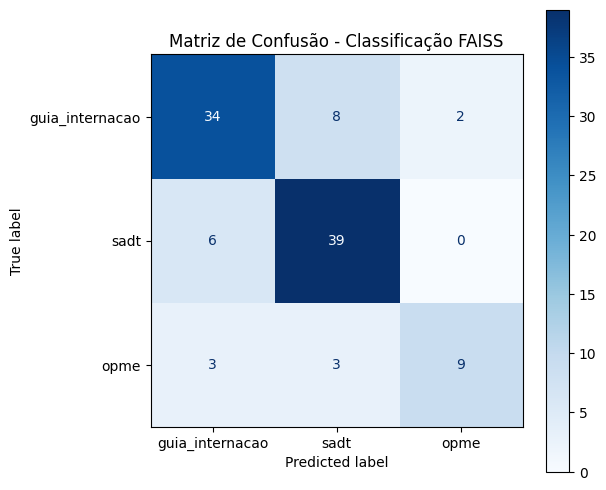

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming label_nomes is already defined from previous steps
label_nomes = ["guia_internacao","sadt","opme"]

cm_faiss = confusion_matrix(y_true_faiss, y_pred_faiss, labels=label_nomes)
disp_faiss = ConfusionMatrixDisplay(confusion_matrix=cm_faiss, display_labels=label_nomes)

fig_faiss, ax_faiss = plt.subplots(figsize=(6,6))
disp_faiss.plot(ax=ax_faiss, cmap='Blues', values_format='d')
plt.title("Matriz de Confusão - Classificação FAISS")
plt.show()


## Solução versão 1.0.1 - Tipo de documento (SADT e Guia de internação) - Linear probe

### Configuração do ambiente

In [ ]:
!pip install torch>=1.10 transformers>=4.30 Pillow>=9.0.0 sentence-transformers faiss-cpu albumentations pdf2image pillow --quiet

In [ ]:
!sudo apt-get update
!sudo apt-get install poppler-utils -y

### Treinamento do modelo


Relatório de Classificação no teste (com Inválido):
                 precision    recall  f1-score   support

guia_internacao       1.00      1.00      1.00        15
           sadt       1.00      1.00      1.00        15
       inválido       0.00      0.00      0.00         0

       accuracy                           1.00        30
      macro avg       0.67      0.67      0.67        30
   weighted avg       1.00      1.00      1.00        30



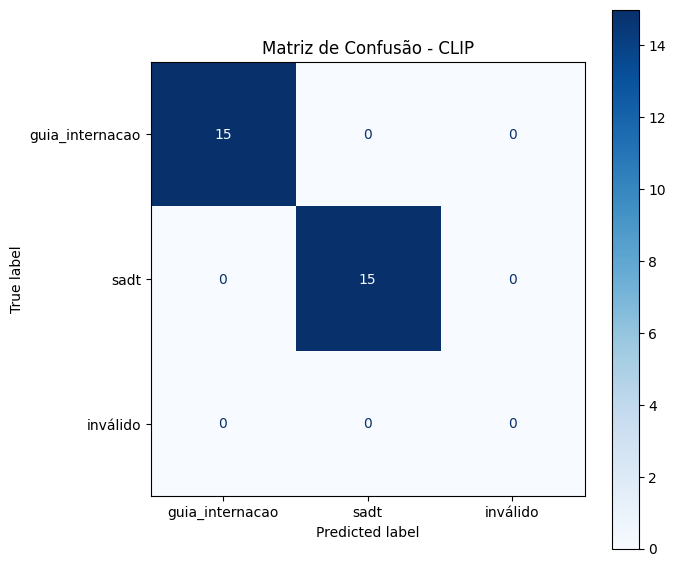

In [ ]:
import os
import torch
import joblib
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from transformers import CLIPModel, CLIPProcessor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import warnings
warnings.filterwarnings('ignore')

# Caminho base no Google Drive
caminho_base01 = "/content/drive/MyDrive/sadt"
caminho_base02 = "/content/drive/MyDrive/guia_internacao"

# Lista para armazenar os caminhos e nomes das pastas
arquivos_sadt = []

# Percorre todas as pastas e subpastas
for root, dirs, files in os.walk(caminho_base01):
    for file in files:
        if file.lower().endswith(".png"):
            caminho_completo = os.path.join(root, file)
            nome_pasta = os.path.basename(os.path.dirname(caminho_completo))
            arquivos_sadt.append((caminho_completo, nome_pasta))

# Lista para armazenar os caminhos e nomes das pastas
arquivos_guia_inter = []

# Percorre todas as pastas e subpastas
for root, dirs, files in os.walk(caminho_base02):
    for file in files:
        if file.lower().endswith(".png"):
            caminho_completo = os.path.join(root, file)
            nome_pasta = os.path.basename(os.path.dirname(caminho_completo))
            arquivos_guia_inter.append((caminho_completo, nome_pasta))


# Classificar todos os documentos na lista de testes
arquivos_total = arquivos_guia_inter + arquivos_sadt
label_nomes = ["guia_internacao","sadt"]

# Sua lista: (caminho, label)
imagens_labels = arquivos_total

# 1. Split em treino/teste preservando proporção de classes
X = [x[0] for x in imagens_labels]
y = [x[1] for x in imagens_labels]
classes_unicas = sorted(list(set(y)))
test_size = 0.33 if len(X) > 30 else 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=35, stratify=y
)

# 2. Inicialização do CLIP
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# 3. Função para extrair embeddings
def extrair_embeddings(paths, processor, model):
    embs = []
    for path in paths:
        image = Image.open(path).convert("RGB").resize((224,224))
        inputs = processor(images=image, return_tensors="pt").to(device)
        with torch.no_grad():
            features = model.get_image_features(**inputs)
        embs.append(features.cpu().numpy().flatten())
    return np.vstack(embs)

# 4. Treinamento
X_train_emb = extrair_embeddings(X_train, processor, model)
y_train_idx = np.array([classes_unicas.index(lbl) for lbl in y_train])
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_emb, y_train_idx)


### Teste com threshold

In [ ]:
# 5. Teste com threshold
X_test_emb = extrair_embeddings(X_test, processor, model)
probas = clf.predict_proba(X_test_emb)
y_pred_idx = np.argmax(probas, axis=1)
max_proba = np.max(probas, axis=1)
threshold = 0.55
classes_completo = classes_unicas + ["inválido"]

y_pred_final = []
for idx, prob in zip(y_pred_idx, max_proba):
    if prob < threshold:
        y_pred_final.append("inválido")
    else:
        y_pred_final.append(classes_unicas[idx])

# Use y_test directly as it contains the true labels as strings
y_test_nome = y_test

print("\nRelatório de Classificação no teste (com Inválido):")
print(classification_report(y_test_nome, y_pred_final, labels=classes_completo))

# 6. Matriz de Confusão (com "inválido")
from sklearn.utils.multiclass import unique_labels
cm = confusion_matrix(y_test_nome, y_pred_final, labels=classes_completo)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_completo)
fig, ax = plt.subplots(figsize=(7, 7))
disp.plot(ax=ax, cmap="Blues", values_format='d')
plt.title("Matriz de Confusão - CLIP")
plt.show()

### Função para validação do layout

In [ ]:
def predict_image(path, processor, model, clf, classes_unicas):
    image = Image.open(path).convert("RGB").resize((224,224))
    inputs = processor(images=image, return_tensors="pt").to(device)
    with torch.no_grad():
        features = model.get_image_features(**inputs)
    emb = features.cpu().numpy().flatten().reshape(1, -1)
    probs = clf.predict_proba(emb)
    idx_pred = np.argmax(probs)
    return {
        "classe": classes_unicas[idx_pred],
        "confianca": probs[0, idx_pred],
        "probs": {classes_unicas[i]: float(p) for i, p in enumerate(probs[0])}
    }


In [ ]:
# Escolha um caminho de imagem para teste (pode ser do seu X_test)
imagem_teste = X_test[25]

# Teste a predição
resultado = predict_image(imagem_teste, processor, model, clf, classes_unicas)

print("Arquivo:", imagem_teste)
print("Classe predita:", resultado['classe'])
print("Confiança:", resultado['confianca'].round(4))
print("Probabilidades:", resultado['probs'])

Arquivo: /content/drive/MyDrive/sadt/sadt_nao_manuscrito_assMO_assMed_carimboMed_nao_assMedDig_03_pg_452923073_31052025084202422_COSME_page1.png
Classe predita: sadt
Confiança: 0.8269
Probabilidades: {'guia_internacao': 0.17310064539004033, 'sadt': 0.8268993546099597}


### Salvar o modelo

In [ ]:
joblib.dump(clf, "tipagem_layout_v1.pkl")

['tipagem_layout_v1.pkl']

### Função modulada para API

In [ ]:
import os
import torch
import joblib
import numpy as np
from PIL import Image
from pdf2image import convert_from_path
from transformers import CLIPProcessor, CLIPModel

THRESHOLD = 0.60

clf = joblib.load("tipagem_layout_v1.pkl")
classes_unicas = ["guia_internacao","sadt"]

device = "cuda" if torch.cuda.is_available() else "cpu"
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)

def extrair_embeddings_api(imagem_path, processor, model, device):
    image = Image.open(imagem_path).convert("RGB").resize((224,224))
    inputs = processor(images=image, return_tensors="pt").to(device)
    with torch.no_grad():
        features = model.get_image_features(**inputs)
    return features.cpu().numpy()

def classificar_documento(
    imagem_path,
    input_tipo,
    processor,
    model,
    device
):
    emb = extrair_embeddings_api(imagem_path, processor, model, device)
    probas = clf.predict_proba(emb)
    idx_pred = int(np.argmax(probas))
    conf = float(np.max(probas))
    classe_predita = classes_unicas[idx_pred]

    # Mapeamento nome -> código
    codigo_map = {
        "guia_internacao": 2,
        "sadt": 1
    }

    # Default: código inválido = 0
    codigo_final = 0

    # Verifica threshold
    if conf >= THRESHOLD:
        # Se input_tipo 3 ou 6, só pode ser guia_internacao ou sadt
        if input_tipo in [3, 6]:
            if classe_predita in codigo_map:
                codigo_final = codigo_map[classe_predita]
        else:
            # Para outros tipos, aceita normalmente
            if classe_predita in codigo_map:
                codigo_final = codigo_map[classe_predita]

    return {
        "modelo": codigo_final,
        "confidence": round(conf, 4),
        "layout": classe_predita,
    }

def classificar_arquivo(
    caminho_arquivo,
    input_tipo,
    processor,
    model,
    device
):
    resultados = []
    nome_arquivo = os.path.basename(caminho_arquivo)
    extensao = os.path.splitext(caminho_arquivo)[-1].lower()

    if extensao == '.pdf':
        # PDF: processa página por página
        paginas = convert_from_path(caminho_arquivo, dpi=200)
        for idx, pil_image in enumerate(paginas):
            temp_img_path = f"temp_page_{idx+1}.png"
            pil_image.save(temp_img_path)
            resultado = classificar_documento(
                temp_img_path,
                input_tipo,
                processor,
                model,
                device
            )
            resultados.append({
                "arquivo": nome_arquivo,
                "pagina": idx+1,
                "modelo": resultado["modelo"],
                "confidence": resultado["confidence"],
                "layout": resultado["layout"]
            })
            os.remove(temp_img_path)
    elif extensao in ['.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif']:
        # Imagem única
        resultado = classificar_documento(
            caminho_arquivo,
            input_tipo,
            processor,
            model,
            device
        )
        resultados.append({
            "arquivo": nome_arquivo,
            "pagina": 1,
            "modelo": resultado["modelo"],
            "confidence": resultado["confidence"],
            #"layout": resultado["layout"]
        })
    else:
        raise ValueError("Formato de arquivo não suportado!")

    return resultados


In [ ]:
# Exemplo de uso:
#imagem_path = "/content/drive/MyDrive/guia_internacao/soli_int_nao_manuscrito_nao_assMO_nao_assMed_nao_carimboMed_nao_assMedDig_01_pg_457388241_300620252028232823_20250630_203109_page1.png"
pdf_path = "/content/sadt_nao_manuscrito_nao_assMO_nao_assMed_nao_carimboMed_nao_assMedDig_03_pg_432291600_170120251717331733_Pedido_e_documento_Clara_Cardoso.pdf"
resultados = classificar_arquivo(pdf_path, 3, processor, model, device)

#for r in resultados:
#     print(r)

In [ ]:
resultados

[{'arquivo': 'sadt_nao_manuscrito_nao_assMO_nao_assMed_nao_carimboMed_nao_assMedDig_03_pg_432291600_170120251717331733_Pedido_e_documento_Clara_Cardoso.pdf',
  'pagina': 1,
  'modelo': 1,
  'confidence': 0.9042,
  'layout': 'sadt'},
 {'arquivo': 'sadt_nao_manuscrito_nao_assMO_nao_assMed_nao_carimboMed_nao_assMedDig_03_pg_432291600_170120251717331733_Pedido_e_documento_Clara_Cardoso.pdf',
  'pagina': 2,
  'modelo': 1,
  'confidence': 0.9198,
  'layout': 'sadt'},
 {'arquivo': 'sadt_nao_manuscrito_nao_assMO_nao_assMed_nao_carimboMed_nao_assMedDig_03_pg_432291600_170120251717331733_Pedido_e_documento_Clara_Cardoso.pdf',
  'pagina': 3,
  'modelo': 0,
  'confidence': 0.5739,
  'layout': 'guia_internacao'}]